<a href="https://colab.research.google.com/github/ayydannm/MachineLearning/blob/main/End_to_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#California housing prices

In [13]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/housing.csv

--2026-01-13 12:02:43--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2026-01-13 12:02:43 (42.5 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [14]:
df1=pd.read_csv('housing.csv')
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
df1.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [16]:
df1.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [17]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='longitude', ylabel='latitude'>

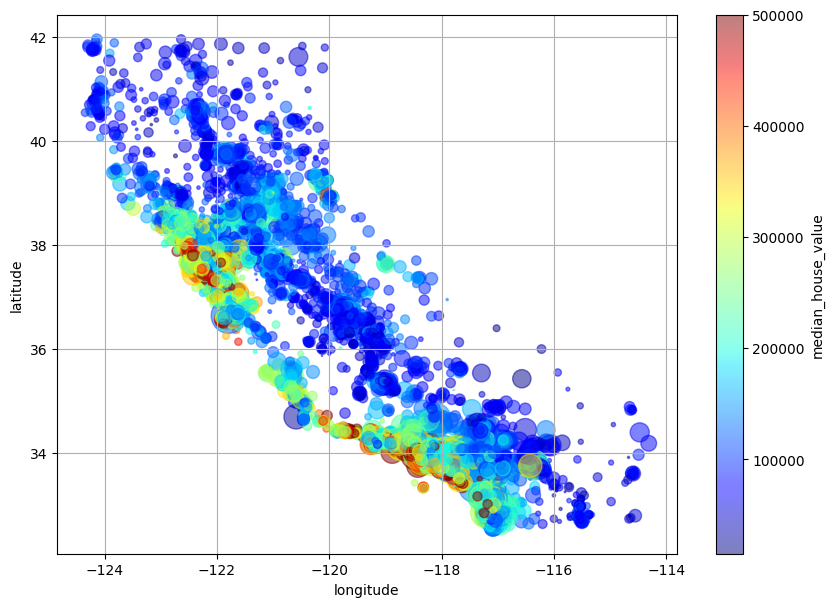

In [18]:
df1.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,c='median_house_value',cmap='jet',figsize=(10,7),grid=True,s=df1['total_bedrooms']/10)

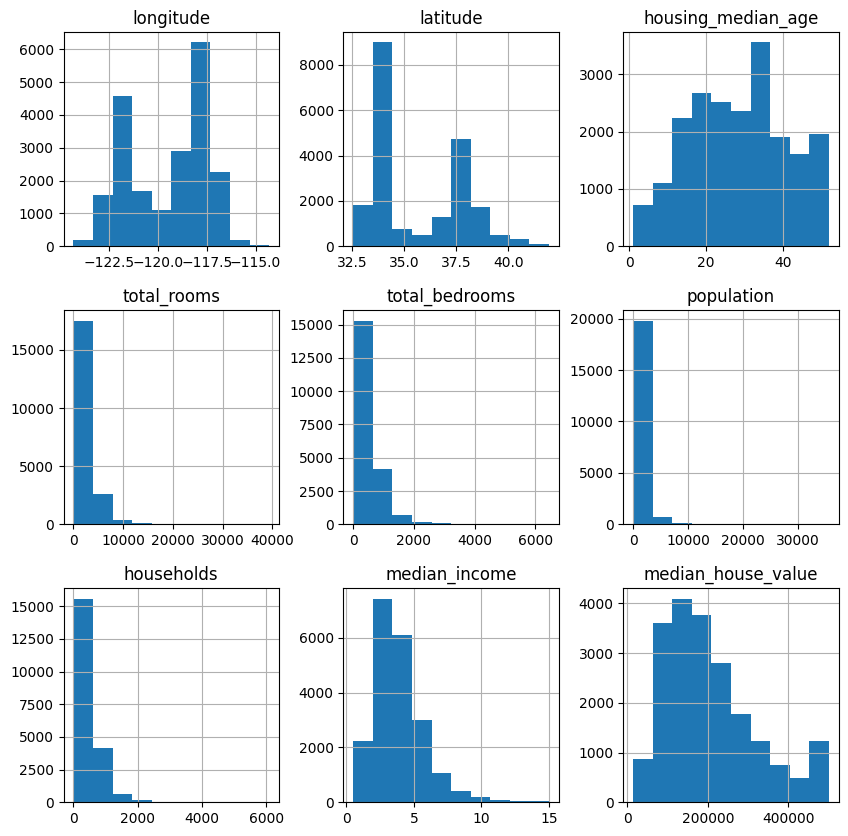

In [19]:
df1.hist(figsize=(10,10));

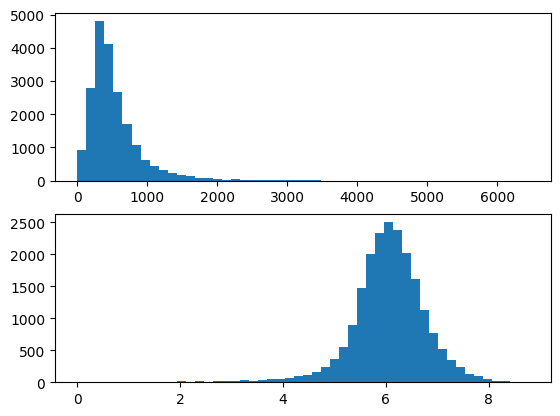

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.hist(df1['total_bedrooms'],bins=50)
plt.subplot(2,1,2)
plt.hist(np.log(df1['total_bedrooms']),bins=50);

In [21]:
df1.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


In [22]:
X=df1.drop('median_house_value',axis=1)
y=df1['median_house_value'].copy()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

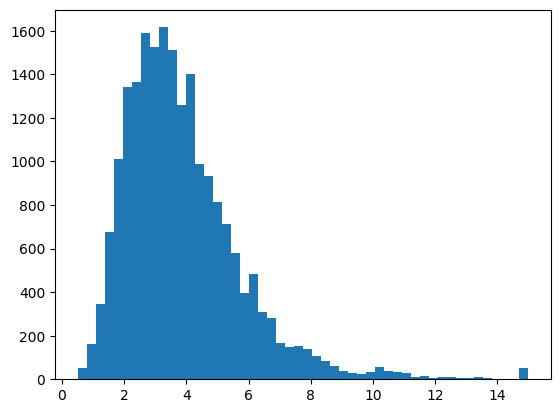

In [24]:
plt.hist(df1['median_income'],bins=50);

<Axes: xlabel='income_cut'>

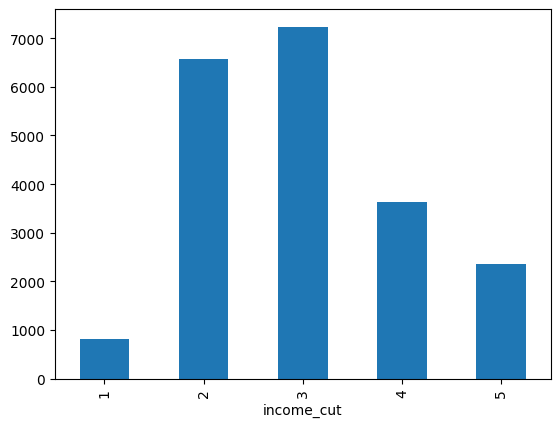

In [25]:
df1['income_cut']=pd.cut(df1['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
df1['income_cut'].value_counts().sort_index().plot(kind='bar')

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=df1['income_cut'],test_size=0.2,random_state=42)

In [27]:
df1.drop('income_cut',axis=1,inplace=True)

In [28]:
df1['rooms_per_house']=df1['total_rooms']/df1['households']
df1['bedrooms_per_room']=df1['total_bedrooms']/df1['total_rooms']
df1['population_per_house']=df1['population']/df1['households']

In [29]:
df1.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_house,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_house,-0.023737
population,-0.024650
longitude,-0.045967


In [30]:
df1.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [31]:
#option1
df1.drop('total_bedrooms',axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_room,population_per_house
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [32]:
#option2
df1.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_room,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [33]:
#option3
df1['total_bedrooms'].fillna(df1['total_bedrooms'].median())

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [34]:
X_num=X_train.select_dtypes(include=np.number)
X_cat=X_train.select_dtypes(include='object') #exclude=np.number
X_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [35]:
X_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [36]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(X_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [38]:
X_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [39]:
pd.DataFrame(imputer.transform(X_num),columns=imputer.feature_names_in_)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
1,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
2,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
3,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
4,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
16507,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
16508,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
16509,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
16510,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [40]:
X_cat.value_counts()

,count
ocean_proximity,
<1H OCEAN,7274
INLAND,5301
NEAR OCEAN,2089
NEAR BAY,1846
ISLAND,2


In [41]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
encoder.fit_transform(X_cat)

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [42]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit_transform(X_cat).toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
pd.DataFrame(scaler.fit_transform(X_num),columns=X_num.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.195740,0.558511,1.000000,0.084414,0.179417,0.096491,0.192832,0.110261
1,0.605477,0.169149,0.764706,0.049926,0.056853,0.040670,0.066455,0.385353
2,0.240365,0.618085,0.627451,0.027494,0.034788,0.034290,0.037708,0.133315
3,0.734280,0.127660,0.313725,0.106109,0.136898,0.112992,0.145417,0.121509
4,0.628803,0.129787,0.686275,0.110992,0.194878,0.117102,0.218592,0.208914
...,...,...,...,...,...,...,...,...
16507,0.603448,0.139362,0.784314,0.056844,0.095990,0.057355,0.097443,0.290382
16508,0.511156,0.401064,0.431373,0.074851,0.095184,0.086861,0.099123,0.142991
16509,0.739351,0.004255,0.235294,0.099649,0.124658,0.172433,0.141684,0.245631
16510,0.603448,0.160638,0.705882,0.096114,0.140441,0.105631,0.156244,0.251417


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
pd.DataFrame(scaler.fit_transform(X_num),columns=X_num.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.608519,0.117021,1.000000,-0.831171,-0.641166,-0.807018,-0.614336,-0.779479
1,0.210953,-0.661702,0.529412,-0.900148,-0.886294,-0.918660,-0.867090,-0.229293
2,-0.519270,0.236170,0.254902,-0.945012,-0.930424,-0.931419,-0.924585,-0.733369
3,0.468560,-0.744681,-0.372549,-0.787782,-0.726204,-0.774015,-0.709166,-0.756983
4,0.257606,-0.740426,0.372549,-0.778015,-0.610243,-0.765796,-0.562815,-0.582171
...,...,...,...,...,...,...,...,...
16507,0.206897,-0.721277,0.568627,-0.886312,-0.808021,-0.885290,-0.805115,-0.419236
16508,0.022312,-0.197872,-0.137255,-0.850298,-0.809631,-0.826279,-0.801755,-0.714018
16509,0.478702,-0.991489,-0.529412,-0.800702,-0.750684,-0.655134,-0.716632,-0.508738
16510,0.206897,-0.678723,0.411765,-0.807773,-0.719117,-0.788738,-0.687512,-0.497166


In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
pd.DataFrame(scaler.fit_transform(X_num),columns=scaler.feature_names_in_)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.423037,1.013606,1.861119,0.311912,1.359094,0.137460,1.394812,-0.936491
1,0.596394,-0.702103,0.907630,-0.308620,-0.436356,-0.693771,-0.373485,1.171942
2,-1.203098,1.276119,0.351428,-0.712240,-0.759584,-0.788768,-0.775727,-0.759789
3,1.231216,-0.884924,-0.919891,0.702262,0.736231,0.383175,0.731375,-0.850281
4,0.711362,-0.875549,0.589800,0.790125,1.585590,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.136961,-0.445315,0.060101,0.444041
16508,0.131525,0.319822,-0.443146,0.139847,0.125165,-0.005950,0.083608,-0.685630
16509,1.256209,-1.428701,-1.237721,0.586026,0.556922,1.268299,0.679135,0.101049
16510,0.586397,-0.739605,0.669257,0.522417,0.788136,0.273563,0.882868,0.145396


In [47]:
from sklearn.preprocessing import FunctionTransformer
log_transformer=FunctionTransformer(np.log,inverse_func=np.exp)
log_pop=log_transformer.transform(X_num[['population']])

In [48]:
from sklearn.pipeline import Pipeline,make_pipeline
X_num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
X_num=pd.DataFrame(X_num_pipeline.fit_transform(X_num),columns=X_num.columns)
X_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [49]:
X_cat_pipeline=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder()
)
X_cat=pd.DataFrame(X_cat_pipeline.fit_transform(X_cat),columns=X_cat_pipeline.feature_names_in_)
X_cat

,ocean_proximity
0,3.0
1,0.0
2,1.0
3,1.0
4,4.0
...,...
16507,0.0
16508,1.0
16509,4.0
16510,0.0


In [50]:
X_cat=X_train.select_dtypes(include='object')
X_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [51]:
X_cat_pipeline=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder()
)
X_cat=pd.DataFrame(X_cat_pipeline.fit_transform(X_cat).toarray(),columns=X_cat_pipeline.get_feature_names_out())
X_cat

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,0.0,0.0,0.0,0.0,1.0
16510,1.0,0.0,0.0,0.0,0.0


In [52]:
pd.concat([X_num,X_cat],axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [53]:
cat_columns=X_train.select_dtypes(include='object').columns
num_columns=X_train.select_dtypes(include=np.number).columns
num_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [54]:
cat_columns

Index(['ocean_proximity'], dtype='object')

In [55]:
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer([
    ('num',X_num_pipeline,num_columns),
    ('cat',X_cat_pipeline,cat_columns)
])
pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [56]:
X_num_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

X_cat_pipeline=make_pipeline(
    SimpleImputer(strategy='constant',fill_value='opps'),
    OneHotEncoder()
)

cat_columns=X_train.select_dtypes(include='object').columns
num_columns=X_train.select_dtypes(include=np.number).columns


transformer=ColumnTransformer([
    ('num',X_num_pipeline,num_columns),
    ('cat',X_cat_pipeline,cat_columns)

])

X_train_prepared=pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
X_test_prepared=pd.DataFrame(transformer.transform(X_test),columns=transformer.get_feature_names_out())

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train_prepared,y_train)
lin_reg.score(X_test_prepared,y_test)


0.6233813507638212

In [58]:
lin_reg.predict(X_test_prepared.iloc[:5])

array([383993.91592627, 252310.54068352, 372503.59809196, 279372.70201381,
       225899.3327622 ])

In [59]:
y_test.iloc[:5]

,median_house_value
3905,397700.0
16821,202900.0
2900,310000.0
7193,314300.0
13928,187500.0


In [60]:
from sklearn.linear_model import LinearRegression

full_pipeline=make_pipeline(transformer,LinearRegression())
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='opps',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [61]:
full_pipeline.score(X_test,y_test)

0.6233813507638212

In [62]:
from sklearn.tree import DecisionTreeRegressor

full_pipeline=make_pipeline(transformer,DecisionTreeRegressor())
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.6568524119741419

In [63]:
from sklearn.ensemble import RandomForestRegressor

full_pipeline=make_pipeline(transformer,RandomForestRegressor())
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.8197719916087712

In [64]:
full_pipeline.predict(X_test.iloc[:5])

array([392138.17, 208199.  , 342120.11, 317204.  , 256269.12])

In [65]:
y_test.iloc[:5]

,median_house_value
3905,397700.0
16821,202900.0
2900,310000.0
7193,314300.0
13928,187500.0


In [66]:
from sklearn.metrics import mean_absolute_error
y_pred=full_pipeline.predict(X_test)
mean_absolute_error(y_test,y_pred)

31596.368905038762

In [67]:
df1['median_house_value'].mean()

np.float64(206855.81690891474)

In [68]:
(206855,206855-31606,206855+31606)

(206855, 175249, 238461)

In [69]:
def column_ratio(X):
  return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer,feature_names_in):
  return ['ratio']

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy='median'),
      FunctionTransformer(column_ratio,feature_names_out=ratio_name),
      StandardScaler()
  )

log_pipeline=make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log,feature_names_out='one-to-one'),
    StandardScaler()
)

cat_pipeline=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

default_num_pipeline=make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

preprocessing=ColumnTransformer([
    ('rooms_per_house',ratio_pipeline(),['total_rooms','households']),
    ('bedrooms_per_room',ratio_pipeline(),['total_bedrooms','total_rooms']),
    ('population_per_house',ratio_pipeline(),['population','households']),
    ('log',log_pipeline,['population','total_bedrooms','total_rooms','households','median_income']),
    ('cat',cat_pipeline,['ocean_proximity'])],
remainder=default_num_pipeline)

In [70]:
X_train_prepared=pd.DataFrame(preprocessing.fit_transform(X_train),
                              columns=preprocessing.get_feature_names_out())
X_train_prepared

,rooms_per_house__ratio,bedrooms_per_room__ratio,population_per_house__ratio,log__population,log__total_bedrooms,log__total_rooms,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age
0,-0.866027,1.846624,-0.330204,0.456906,1.324114,0.637892,1.310369,-1.071522,0.0,0.0,0.0,1.0,0.0,-1.423037,1.013606,1.861119
1,0.024550,-0.508121,-0.253616,-0.711654,-0.252671,-0.063576,-0.142030,1.194712,1.0,0.0,0.0,0.0,0.0,0.596394,-0.702103,0.907630
2,-0.041193,-0.202155,-0.051041,-0.941997,-0.925266,-0.859927,-0.913030,-0.756981,0.0,1.0,0.0,0.0,0.0,-1.203098,1.276119,0.351428
3,-0.034858,-0.149006,-0.141475,0.670700,0.952773,0.943475,0.925373,-0.912253,0.0,1.0,0.0,0.0,0.0,1.231216,-0.884924,-0.919891
4,-0.666554,0.963208,-0.306148,0.719093,1.437622,1.003590,1.481464,0.034537,0.0,0.0,0.0,0.0,1.0,0.711362,-0.875549,0.589800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.452111,0.804368,-0.269780,-0.247054,0.465581,0.109720,0.379471,0.648953,1.0,0.0,0.0,0.0,0.0,0.586397,-0.833359,0.987087
16508,0.036792,-0.192328,-0.073741,0.314542,0.454022,0.477277,0.402773,-0.637675,0.0,1.0,0.0,0.0,0.0,0.131525,0.319822,-0.443146
16509,-0.109987,-0.242492,0.158542,1.243381,0.824206,0.859552,0.889897,0.333540,0.0,0.0,0.0,0.0,1.0,1.256209,-1.428701,-1.237721
16510,-0.360937,0.259775,-0.210332,0.579462,0.987851,0.811293,1.023329,0.377051,1.0,0.0,0.0,0.0,0.0,0.586397,-0.739605,0.669257


In [71]:
full_pipeline=make_pipeline(preprocessing,LinearRegression())
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.5586563655046908

In [72]:
full_pipeline=make_pipeline(preprocessing,DecisionTreeRegressor())
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.6399621110626782

In [73]:
full_pipeline=make_pipeline(preprocessing,RandomForestRegressor())
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.8104662628435575

In [74]:
for i in range(100,171,10):
  full_pipeline=make_pipeline(preprocessing,RandomForestRegressor(n_estimators=i))
  full_pipeline.fit(X_train[:8000],y_train[:8000])
  print(i,full_pipeline.score(X_test,y_test))

100 0.7920142949411557
110 0.7943502916282323
120 0.7915040961518067
130 0.7912398007335477
140 0.7932117790599506
150 0.7920852024657844
160 0.7933600307847166
170 0.7933048599314414


In [75]:
full_pipeline=make_pipeline(preprocessing,RandomForestRegressor(n_estimators=180))
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.8109504835029732

In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(full_pipeline,X_train[:8000],y_train[:8000],cv=5,scoring='neg_mean_absolute_error')

array([-34458.30165625, -34514.96312153, -33485.61457292, -34958.60696181,
       -34776.79617361])

In [77]:
X_train_prepared=pd.DataFrame(preprocessing.fit_transform(X_train),
                              columns=preprocessing.get_feature_names_out())
X_test_prepared=pd.DataFrame(preprocessing.transform(X_test),
                             columns=preprocessing.get_feature_names_out())

In [91]:
from sklearn.model_selection import GridSearchCV


params={
    'n_estimators':[100,120,140,160],
    'max_features':[3,5,7,8]
}

grid_search=GridSearchCV(RandomForestRegressor(n_jobs=-1),params,cv=3,scoring='neg_mean_absolute_error')
grid_search.fit(X_train_prepared[:8000],y_train[:8000])

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_features': [3, 5, 7, 8],
                         'n_estimators': [100, 120, 140, 160]},
             scoring='neg_mean_absolute_error')

In [92]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 160}

In [94]:
random_forest_reg=RandomForestRegressor(n_estimators=160,max_features=7)
random_forest_reg.fit(X_train_prepared,y_train)
random_forest_reg.score(X_test_prepared,y_test)

0.8203007455446862

In [95]:
random_forest_reg=grid_search.best_estimator_
random_forest_reg.fit(X_train_prepared,y_train)
random_forest_reg.score(X_test_prepared,y_test)

0.8229652386689746

In [96]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

params={
    'n_estimators':np.arange(100,250,10),
    'max_features':[5,7,8,9,10]
}

random_search=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                                 params,cv=3,scoring=('neg_mean_absolute_error'),
                                 n_iter=15)

random_search.fit(X_train_prepared[:8000],y_train[:8000])


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_iter=15,
                   param_distributions={'max_features': [5, 7, 8, 9, 10],
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240])},
                   scoring='neg_mean_absolute_error')

In [97]:
random_forest_reg=random_search.best_estimator_
random_forest_reg.fit(X_train_prepared,y_train)
random_forest_reg.score(X_test_prepared,y_test)

0.8200862149466599

In [98]:
params={
    'randomforestregressor__n_estimators':[100,120,140,160],
    'randomforestregressor__max_features':[3,5,7,8]
}

grid_search=GridSearchCV(full_pipeline,params,cv=3,
                         scoring='neg_mean_absolute_error')

grid_search.fit(X_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('rooms_per_house',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_n...
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['ocean_proximity'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'randomforestregressor__max_features': [3, 5, 7, 8],
                         'randomforestregressor__n_estimators': [100, 120, 140,
                                                                 160]},
             scoring='neg_mean_absolute_error')

In [103]:
grid_search.best_params_


{'randomforestregressor__max_features': 8,
 'randomforestregressor__n_estimators': 100}

In [104]:
best_model = grid_search.best_estimator_


In [105]:
best_model.score(X_test, y_test)


0.8184010869667618

In [99]:
sorted(zip(random_forest_reg.feature_importances_,X_train_prepared.columns),
       reverse=True)

[(np.float64(0.3727056797078739), 'log__median_income'),
 (np.float64(0.15540886353772893), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.11419247751123499), 'population_per_house__ratio'),
 (np.float64(0.06893790387320689), 'remainder__longitude'),
 (np.float64(0.06385299268288548), 'remainder__latitude'),
 (np.float64(0.06315803877295478), 'bedrooms_per_room__ratio'),
 (np.float64(0.0483690783572459), 'rooms_per_house__ratio'),
 (np.float64(0.04236630048327421), 'remainder__housing_median_age'),
 (np.float64(0.014955020009480199), 'log__population'),
 (np.float64(0.014860508860936752), 'log__total_rooms'),
 (np.float64(0.014854104093715742), 'log__total_bedrooms'),
 (np.float64(0.013753718036097092), 'log__households'),
 (np.float64(0.006872691261647521), 'cat__ocean_proximity_<1H OCEAN'),
 (np.float64(0.003544984431138463), 'cat__ocean_proximity_NEAR OCEAN'),
 (np.float64(0.002020003472231373), 'cat__ocean_proximity_NEAR BAY'),
 (np.float64(0.00014763490834792027), 'cat__ocean_prox

<BarContainer object of 16 artists>

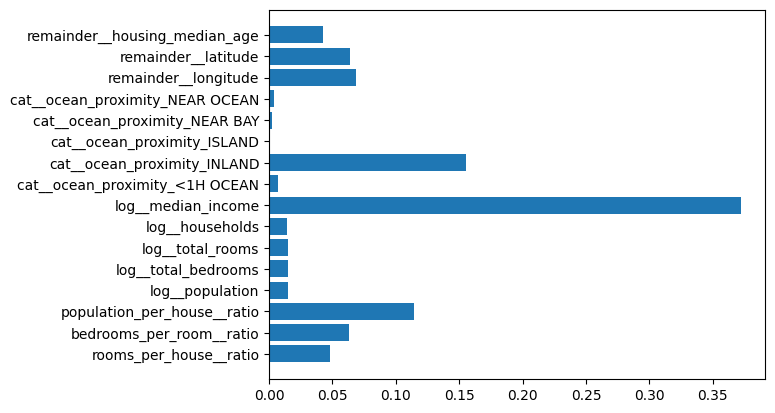

In [100]:
plt.barh(X_train_prepared.columns,random_forest_reg.feature_importances_)

In [101]:
from sklearn.ensemble import IsolationForest

iso_forest=IsolationForest(n_estimators=100,random_state=42)
iso_forest.fit(X_train_prepared)
iso_forest.predict(X_train_prepared)

array([-1,  1,  1, ...,  1,  1, -1])

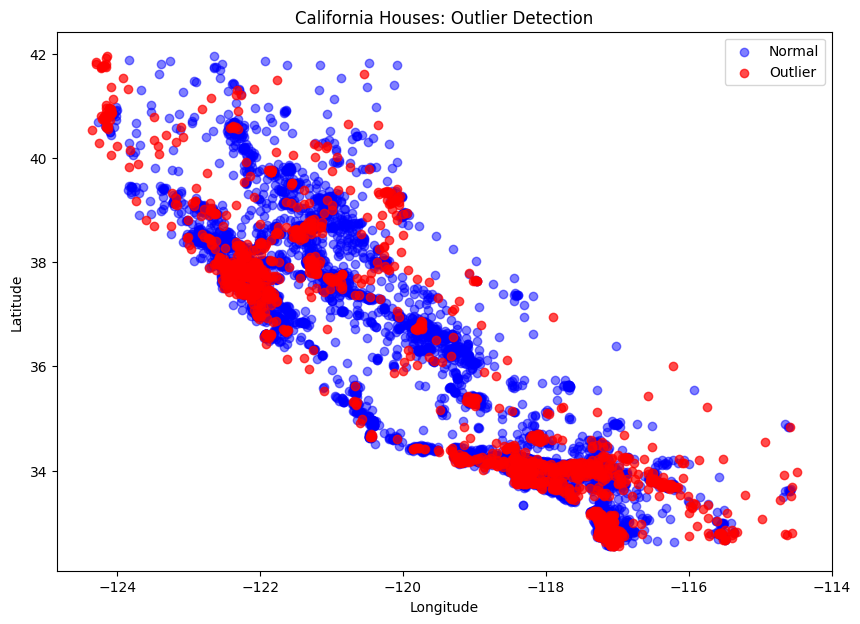

In [107]:
y_pred = iso_forest.predict(X_train_prepared)

normal = X_train[y_pred == 1]
outlier = X_train[y_pred == -1]

plt.figure(figsize=(10,7))
plt.scatter(normal['longitude'], normal['latitude'], c='blue', alpha=0.5, label='Normal')
plt.scatter(outlier['longitude'], outlier['latitude'], c='red', alpha=0.7, label='Outlier')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Houses: Outlier Detection')
plt.legend()
plt.show()

